In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
warnings.simplefilter('ignore') # supress the warnings

In [3]:
# Reading both train and test data
train_data=pd.read_csv('F:/ML-2019/Blue-Mart/Train.csv')
test_data=pd.read_csv('F:/ML-2019/Blue-Mart/Test.csv')


In [4]:
train_data['source']='train'
test_data['source']='test'

In [5]:
# Combining both train ad test data
train_length=len(train_data.index) # Row count of train_data
test_length =len(test_data.index)
data=pd.concat([train_data,test_data],ignore_index=True) #concatinating both train and test data and removing existing index


In [6]:
data.shape # shape(row,column)

(14204, 13)

In [7]:
data.info() # Display generic information like ,data types,count ,null constraint

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 998.8+ KB


In [8]:
#Numerical columns
numerical_columns=data.select_dtypes(include=[np.number]).columns
numerical_columns

Index(['Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year'],
      dtype='object')

In [9]:
#categorical columns
categorical_col=data.select_dtypes(include=['object']).columns
categorical_col

Index(['Item_Fat_Content', 'Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'source'],
      dtype='object')

In [10]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [11]:
#Categorical data description
data.describe(include='object')

,Item_Fat_Content,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
count,14204,14204,14204,14204,14204,10188,14204,14204
unique,5,1559,16,10,3,3,4,2
top,Low Fat,NCB18,Fruits and Vegetables,OUT027,Tier 3,Medium,Supermarket Type1,train
freq,8485,10,2013,1559,5583,4655,9294,8523


In [12]:
data.isnull().sum()#Used to find the missing value count 
#isnull() function returns True for missing and false for non-missing values
#sum() will sum the the missing values/false values

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [13]:
data.apply(lambda x:len(x.unique()))
# Unique value count for each feature 
#x.unique --> return the ndarray/categorical/index which have all unique values
#len() --> length of the object
#lambda function -->Single line function without name and with one expression  [lambda argument(s):expression ], so here x is argument
#apply()  --> Apply a function along on axis [if 0--column axis, 1--row axis]


Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [14]:
#duplicate checking
#As the same product can be in different stores its expected
data.duplicated(subset=['Item_Identifier']).value_counts()

True     12645
False     1559
dtype: int64

In [15]:
#no duplicate in data
data.duplicated(subset=['Item_Identifier','Outlet_Identifier']).value_counts()

False    14204
dtype: int64

In [16]:
#optional
#filter out categorical feature namesto an array
#data.dtypes -->  return series of column datatypes
#index  --> return the index of dataframe
#checking the dtypes is categorical and not the important column , then add to the array
categorical_col=[x for x in data.dtypes.index if data.dtypes[x]=='object' and x not in ['Item_Identifier','Outlet_Identifier','source']]


In [17]:
categorical_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type']

In [18]:
#Frequency of each unique values in categorical column

for col in categorical_col:
    print('\nFrequency of categorical column %s'%col)
    print (data[col].value_counts())



Frequency of categorical column Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of categorical column Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of categorical column Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of categorical column Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of cate

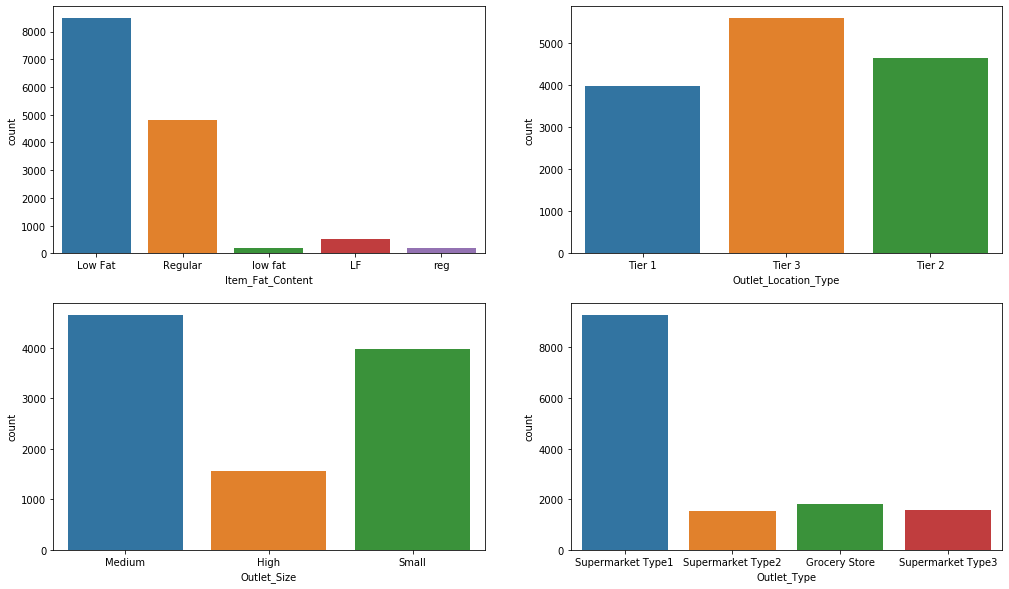

In [19]:
#Data visualisation-- Univarient Analysis
#Categorical data analysis
#countplots() --> unique values with its frequency [mostly for integer varaibales]
fig,axes=plt.subplots(2,2,figsize=(17,10))
sns.countplot('Item_Fat_Content',data=data,ax=axes[0,0])
#sns.countplot('Item_Type',data=data,ax=axes[0,1])
sns.countplot('Outlet_Location_Type',data=data,ax=axes[0,1])
sns.countplot('Outlet_Size',data=data,ax=axes[1,0])
sns.countplot('Outlet_Type',data=data,ax=axes[1,1])


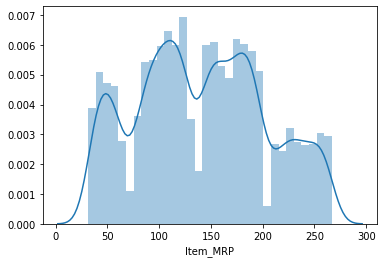

In [20]:
# mostly used in numerical range values
sns.distplot(data['Item_MRP'],kde=True)

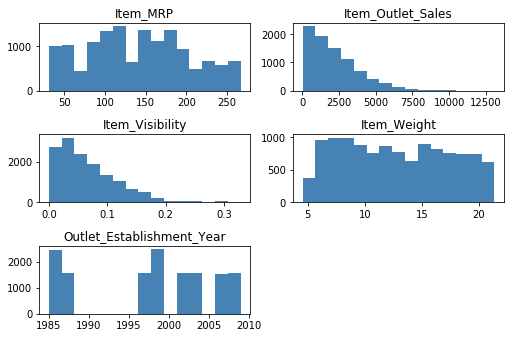

In [21]:
#Numerical data visualisation
data.hist(bins=15,color='steelblue',linewidth=1.0,grid=False)
plt.tight_layout(rect=(0,0,1.2,1.2))
#or we can use sns.distplot() for displaying the same-- univariant distribution
#kde=True --kernal density estimation
#rug=True -- rugplot

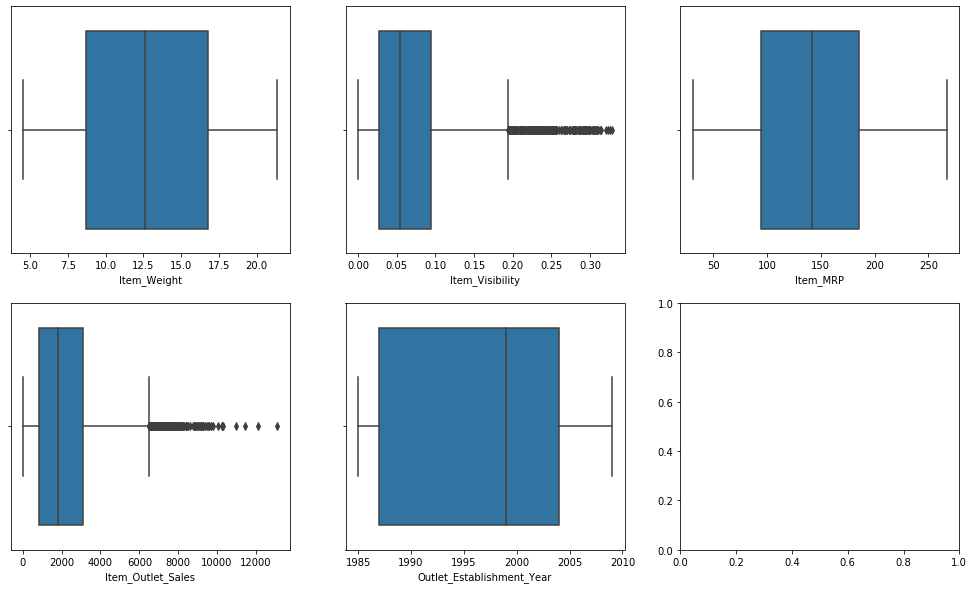

In [22]:
#Univariant Outlier detction can done by using boxplot
#boxplot - for numerical univariant analysis
figs,axs=plt.subplots(2,3,figsize=(17,10))
sns.boxplot('Item_Weight',data=data,ax=axs[0,0])
sns.boxplot('Item_Visibility',data=data,ax=axs[0,1])
sns.boxplot('Item_MRP',data=data,ax=axs[0,2])
sns.boxplot('Item_Outlet_Sales',data=data,ax=axs[1,0])
sns.boxplot('Outlet_Establishment_Year',data=data,ax=axs[1,1])
#sns.boxplot(x='Item_Outlet_Sales',y='Item_MRP',data=data,ax=axs[1,2])

In [23]:
# correlation between target and other numerical variables
corr_matrix=data.corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)


Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

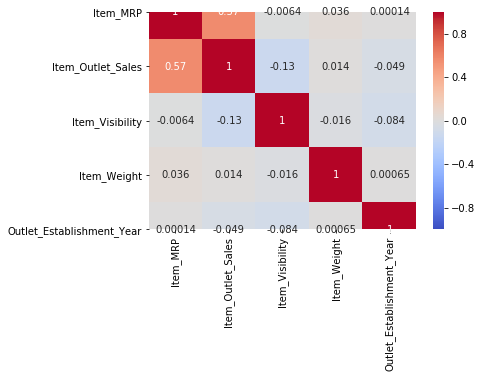

In [24]:
#Visual representation
#Item MRP have corelation with target variable
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True,vmin=-1,vmax=1)

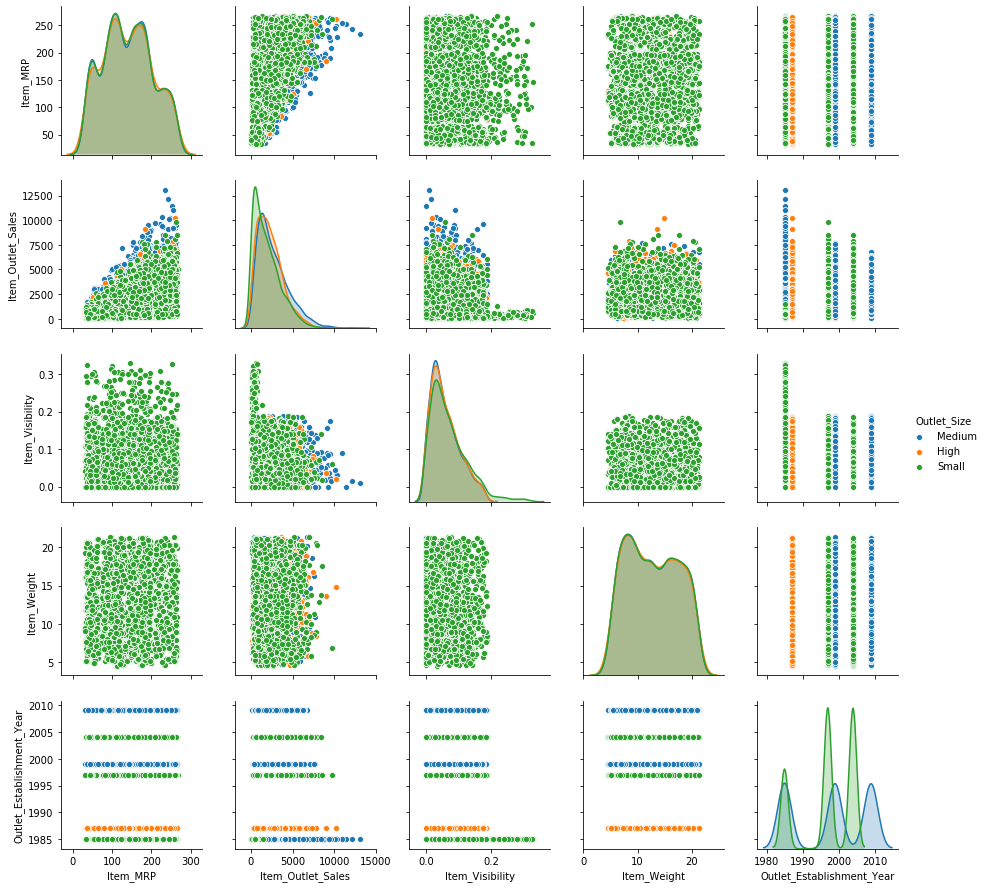

In [25]:
#Bi-variant analysis
#scatter plot for numerical Outlet_Identifier relationship,sns.scatter(x,y,data)
#paiplot - display all features in one shot , but more than 10 features will conjust the figure(numerical)
sns.pairplot(data,hue='Outlet_Size')

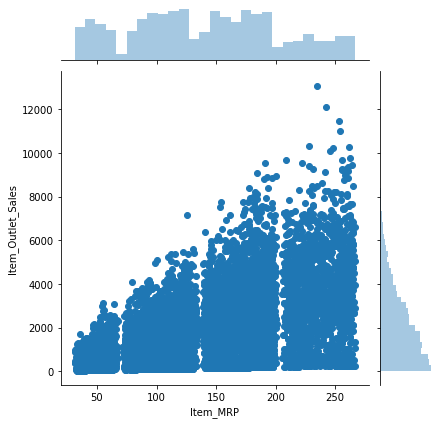

In [26]:
#bi-varaint analysis 
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=data)

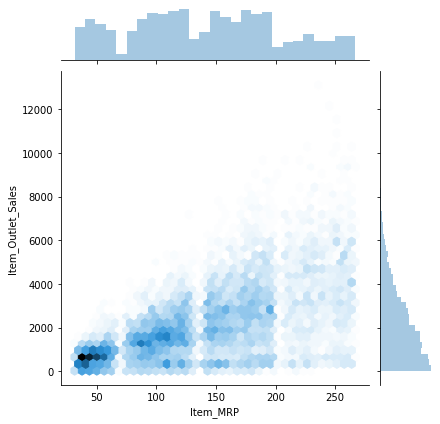

In [27]:
#hexplot - give count based visual representation
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=data,kind='hex')

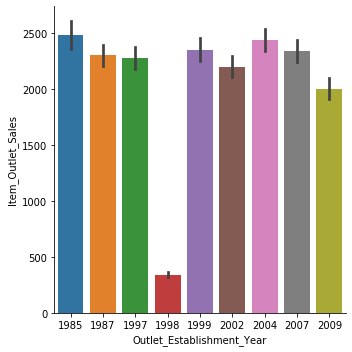

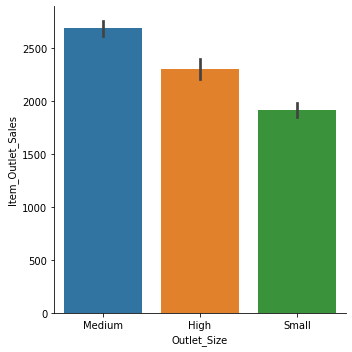

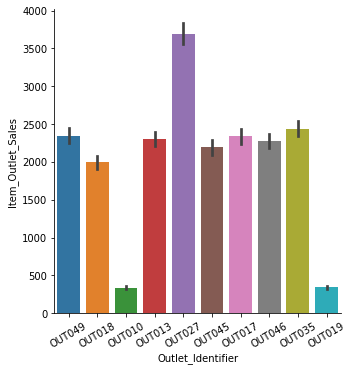

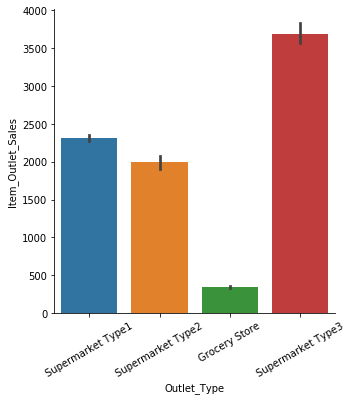

In [28]:
sns.factorplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=data,kind='bar')
sns.factorplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data,kind='bar')
g=sns.catplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=data,kind='bar')
g.set_xticklabels(rotation=30)
g=sns.factorplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data,kind='bar')
g.set_xticklabels(rotation=30)

In [29]:
#pivot table -- 
data.pivot_table(values='Outlet_Type',columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


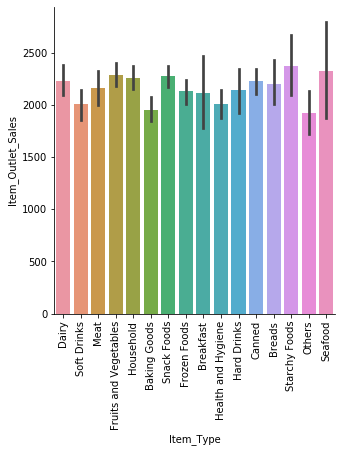

In [30]:
g=sns.catplot(x='Item_Type',y='Item_Outlet_Sales',data=data,kind='bar')
g.set_xticklabels(rotation=90)

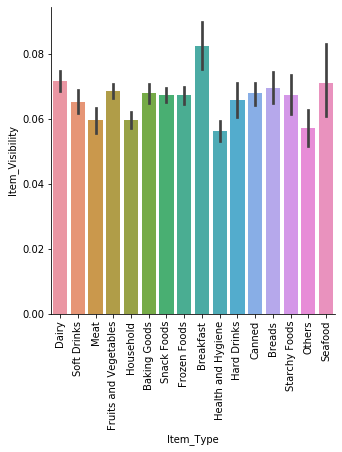

In [31]:
g=sns.factorplot('Item_Type','Item_Visibility',data=data,kind='bar')
g.set_xticklabels(rotation=90)

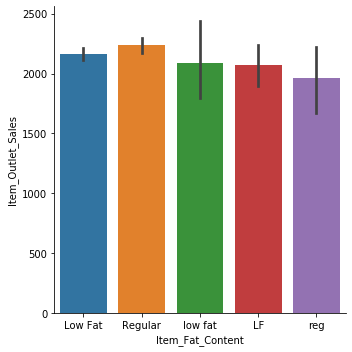

In [32]:
sns.catplot('Item_Fat_Content','Item_Outlet_Sales',data=data,kind='bar')
#we can see that only 2 types available (Low fat & Regular) but written in different ways

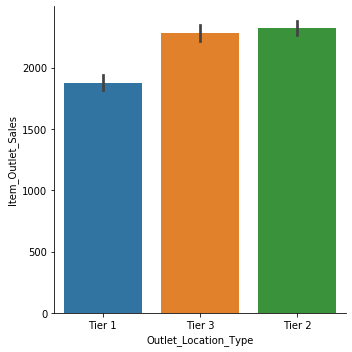

In [33]:
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data,kind='bar')

In [34]:
data.pivot_table(values='Outlet_Location_Type',columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


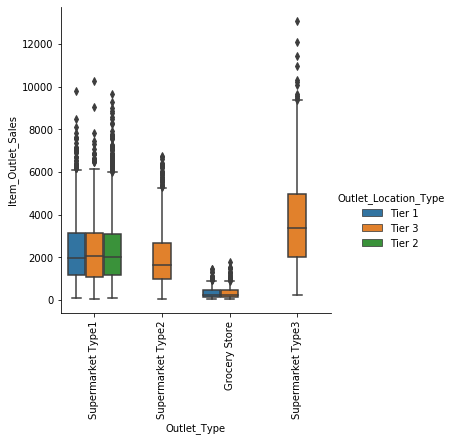

In [35]:
g=sns.catplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=data,kind='box')
g.set_xticklabels(rotation=90)

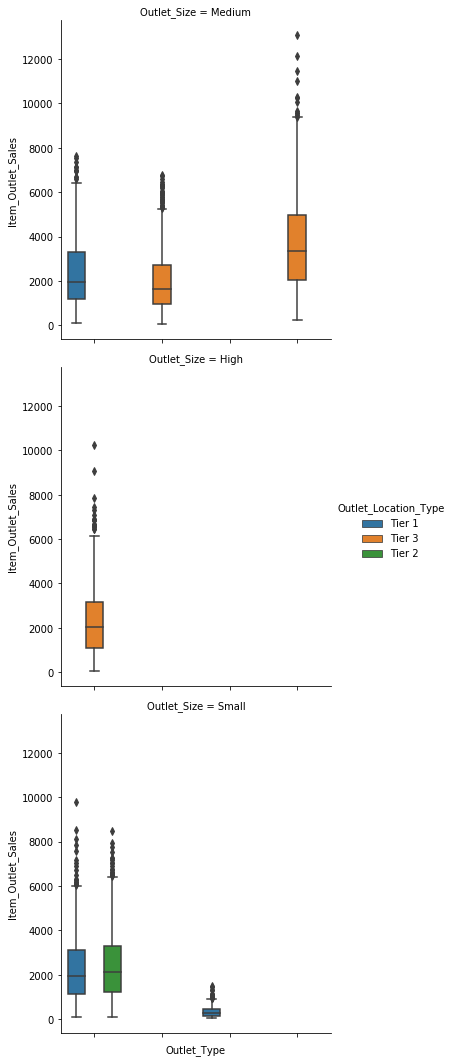

In [36]:
g=sns.catplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Location_Type',row='Outlet_Size',data=data,kind='box')
g.set_xticklabels(rotation=90)

In [37]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Identifier'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Identifier
Tier 1                Grocery Store      OUT019                880
                      Supermarket Type1  OUT046               1550
                                         OUT049               1550
Tier 2                Supermarket Type1  OUT035               1550
                                         OUT045               1548
                                         OUT017               1543
Tier 3                Grocery Store      OUT010                925
                      Supermarket Type1  OUT013               1553
                      Supermarket Type2  OUT018               1546
                      Supermarket Type3  OUT027               1559
Name: Outlet_Identifier, dtype: int64

In [38]:
#All outlet types  are in tier 3 , all have atlest good rate of sales
#Tier 2 have only supermarket type 1 small outlets , so it have high rate of sales 
data.groupby(['Outlet_Location_Type'])['Outlet_Type'].unique()


Outlet_Location_Type
Tier 1                   [Supermarket Type1, Grocery Store]
Tier 2                                  [Supermarket Type1]
Tier 3    [Supermarket Type2, Grocery Store, Supermarket...
Name: Outlet_Type, dtype: object

In [39]:
data.where(data['Outlet_Location_Type']=='Tier 2').dropna()['Outlet_Type'].value_counts()

Supermarket Type1    930
Name: Outlet_Type, dtype: int64

In [40]:
data.where(data['Outlet_Location_Type']=='Tier 2').where(data['Outlet_Type']=='Supermarket Type1').dropna()['Outlet_Size'].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

In [41]:
data.groupby('Outlet_Identifier')['Item_Identifier'].nunique()

Outlet_Identifier
OUT010     925
OUT013    1553
OUT017    1543
OUT018    1546
OUT019     880
OUT027    1559
OUT035    1550
OUT045    1548
OUT046    1550
OUT049    1550
Name: Item_Identifier, dtype: int64

In [42]:
#Data Pre-processing
#Missing Values
data.isnull().sum()/data.shape[0]*100
#Item outlet sales have missing values , bz test data dont have values

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            39.995776
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                  17.171219
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  28.273726
Outlet_Type                   0.000000
source                        0.000000
dtype: float64

In [43]:
#Imputing Misiing values
#Item_Weight
#If the same item is available in different store,use the weight value from there
#by default is men in aggr_func
Avg_weight=data.pivot_table(index='Item_Identifier',values='Item_Weight')
Avg_weight
data['Item_Weight'].isnull().sum()

2439

In [44]:
def weight_check(temp):
    weight=temp[0]
    identifier=temp[1]
    if pd.isnull(weight):
        return Avg_weight['Item_Weight'][Avg_weight.index==identifier]
    else:
        return weight
data['Item_Weight']=data[['Item_Weight','Item_Identifier']].apply(weight_check,axis=1).astype(float)  
data['Item_Weight'].isnull().sum()

0

In [45]:
#Imputing Outlet size
Most_outSize=data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=lambda x:x.mode())
Most_outSize

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [46]:
Most_outSize['Supermarket Type1'][0]

'Small'

In [47]:
def impu_size(temp):
    size=temp[0]
    O_type=temp[1]
    if pd.isnull(size):
        return Most_outSize[O_type][0]
    else:
        return size
data['Outlet_Size']=data[['Outlet_Size','Outlet_Type']].apply(impu_size,axis=1)
data['Outlet_Size'].isnull().sum()

0

In [48]:
#Feature Engineering
#Item visibiity have 0 values, which is ideally wrong.
#Replacing 0 visibilty to mean value of thatproduct from other stores
data.groupby(['Item_Identifier'])['Item_Visibility'].nunique()

Item_Identifier
DRA12     8
DRA24    10
DRA59    10
DRB01     8
DRB13     9
         ..
NCZ30    10
NCZ41     8
NCZ42    10
NCZ53     9
NCZ54    10
Name: Item_Visibility, Length: 1559, dtype: int64

In [49]:
#879 entries have 0 valueas visiblity
(data['Item_Visibility']==0).value_counts()

False    13325
True       879
Name: Item_Visibility, dtype: int64

In [50]:
#loc --used to get value by row/index or boolean/conditional values
#passed boolean series to the row location , which return true values row
# then display only item identifier column value
#If we give ['Item_Identiifer] -will return dataframe else like below will return series'
data.loc[data['Item_Visibility']==0,'Item_Identifier'].value_counts()


FDY07    6
FDO10    4
NCK54    4
DRK37    3
NCQ05    3
        ..
NCO53    1
FDP49    1
FDA26    1
NCA53    1
FDV11    1
Name: Item_Identifier, Length: 683, dtype: int64

In [51]:
visibility_avg=data.pivot_table(values='Item_Visibility',index='Item_Identifier')
visibility_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [52]:
def change_visi(temp):
    vis=temp[0]
    iden=temp[1]
    if vis==0:
        return visibility_avg['Item_Visibility'][visibility_avg.index==iden]
    else:
        return vis
data['Item_Visibility']=data[['Item_Visibility','Item_Identifier']].apply(change_visi,axis=1).astype(float)
(data['Item_Visibility']==0).value_counts()

False    14204
Name: Item_Visibility, dtype: int64

In [53]:
#Established year --instead of starting year- we can find the age of outlet
data['Outlet_Establishment_Year'].min()

1985

In [54]:
data['Outlet_Establishment_Year'].max()

2009

In [55]:
#The data is from 2013 .So need to compute date from established year to 2013 to get the age on 2013
#created new feature
data['Outlet_Age']=2013-data['Outlet_Establishment_Year']


In [56]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [57]:
data['Item_Identifier'].head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [58]:
#str - return the string [:2] return the first 2 char of the string
data['Item_Identifier'].str[:2].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [59]:
#created 3 differnt category based on item_type
data['Item_Type_Combined']=data['Item_Identifier'].str[:2].map({'FD':'Food','DR':'Drinks','NC':'Non-Consumable'})

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
Outlet_Age                   14204 non-null int64
Item_Type_Combined           14204 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 1.1+ MB


In [61]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [62]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [63]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})

In [64]:
#data=data.drop('Item_Fat_Content_Updated',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
Outlet_Age                   14204 non-null int64
Item_Type_Combined           14204 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 1.1+ MB


In [65]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [66]:
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-edible'
data.Item_Fat_Content.value_counts()

Low Fat       6499
Regular       5019
Non-edible    2686
Name: Item_Fat_Content, dtype: int64

In [67]:
#Feature Transformation
func=lambda x:x['Item_Visibility']/visibility_avg['Item_Visibility'][visibility_avg.index==x['Item_Identifier']][0]
data['Item_Visibility_Ratio']=data.apply(func,axis=1).astype(float)
data['Item_Visibility_Ratio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_Ratio, dtype: float64

In [68]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 16 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
Outlet_Age                   14204 non-null int64
Item_Type_Combined           14204 non-null object
Item_Visibility_Ratio        14204 non-null float64
dtypes: float64(5), int64(2), object(9)
memory usage: 1.2+ MB


In [69]:
#covert categorical variable to numerical variable 
le=LabelEncoder()
data['Outlet']=le.fit_transform(data['Outlet_Identifier'])
cat_col=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined']
data[cat_col]=data[cat_col].apply(lambda col:le.fit_transform(col))

In [70]:
[data[col].unique() for col in cat_col]

[array([0, 2, 1], dtype=int64),
 array([0, 2, 1], dtype=int64),
 array([1, 2, 0], dtype=int64),
 array([1, 2, 0, 3], dtype=int64),
 array([1, 0, 2], dtype=int64)]

In [1]:
#Dummy varibales
data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])


NameError: name 'pd' is not defined

In [72]:
data=data.drop('Item_Type',axis=1)

In [73]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Age                     int64
Item_Visibility_Ratio        float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [74]:
#splitting train and test data
#train_data2=data.iloc[:train_length]
train_data2=data.loc[data['source']=='train']


In [75]:
train_data2.shape

(8523, 36)

In [77]:
#test_data2=data.iloc[train_length:]
test_data2=data.loc[data['source']=='test']
test_data2.shape

(5681, 36)

In [90]:
train_data2=train_data2.drop('source',axis=1)

In [91]:
test_data2=test_data2.drop('source',axis=1)

In [120]:
#Model Creation 
#Cross validation is important to find the best model 
# As we are using same cross validation method across different alogrithm ,we can create a common function for the sameand reuse
target_var='Item_Outlet_Sales'
ids=['Item_Identifier','Outlet_Identifier']
def model_score(alg,trainDt,x,y):
    score=cross_val_score(alg,trainDt[x],trainDt[y],cv=20,scoring='neg_mean_squared_error')
    score=np.sqrt(np.abs(score))
    return score.mean()*100 
def model_fit(alg,trainDt,testDt,x,y,IDcol):
    alg.fit(trainDt[x],trainDt[y])
    train_predictions=alg.predict(trainDt[x]) # Prediction on train_data
    cv_score=model_score(alg,trainDt,x,y)
    #Printing score values of train_data new predictions
    print ('RMSE Score : %.4g' %np.sqrt(metrics.mean_squared_error(trainDt[y].values,train_predictions)))
    print ('Cross Value Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g' %(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predicting test data
    trainDt[y]=alg.predict(trainDt[x])
    
    
    # Data submission
    IDcol.append(y)
    submission=pd.DataFrame({x :trainDt[x] for x in IDcol}).to_csv('F:/ML-2019/Blue-Mart/submission.csv',index=False)

    

In [108]:
x=[x for x in train_data2.columns if x not in [target_var]+ids]
len(x)

32

RMSE Score : 3.345
Cross Value Score : Mean - 335.3 | Std - 0 | Min - 335.3 | Max - 335.3


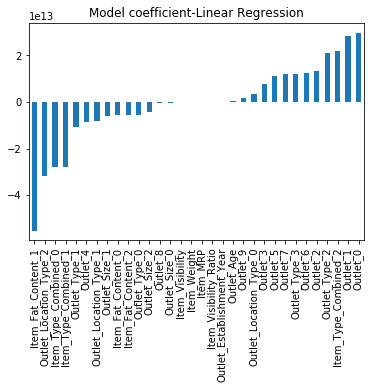

In [122]:
L_alg1=LinearRegression(normalize=True)
model_fit(L_alg1,train_data2,test_data2,x,target_var,ids)
coef1=pd.Series(L_alg1.coef_,x).sort_values()
coef1.plot(kind='bar',title='Model coefficient-Linear Regression')

RMSE Score : 46.2
Cross Value Score : Mean - 4628 | Std - 0 | Min - 4628 | Max - 4628


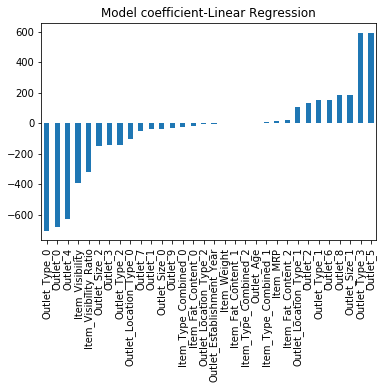

In [125]:
R_alg2=Ridge(alpha=0.05,normalize=True)
model_fit(R_alg2,train_data2,test_data2,x,target_var,ids)
coef2=pd.Series(R_alg2.coef_,x).sort_values()
coef2.plot(kind='bar',title='Model coefficient-Ridgo Regression')

RMSE Score : 3.574e-12
Cross Value Score : Mean - 2754 | Std - 0 | Min - 2754 | Max - 2754


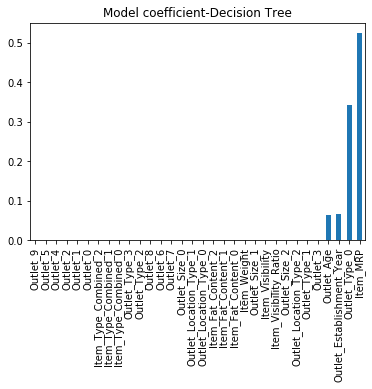

In [130]:
D_alg3=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
model_fit(D_alg3,train_data2,test_data2,x,target_var,ids)
coef3=pd.Series(D_alg3.feature_importances_,x).sort_values()
coef3.plot(kind='bar',title='Model coefficient-Decision Tree')

RMSE Score : 1.88e-12
Cross Value Score : Mean - 2753 | Std - 0 | Min - 2753 | Max - 2753


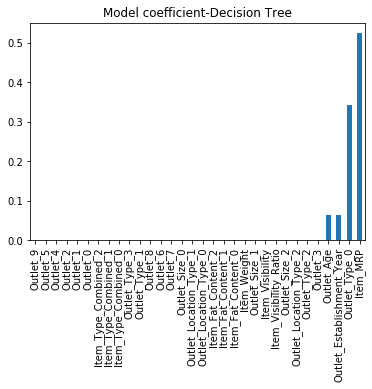

In [132]:
D_alg31=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
model_fit(D_alg31,train_data2,test_data2,x,target_var,ids)
coef4=pd.Series(D_alg31.feature_importances_,x).sort_values()
coef4.plot(kind='bar',title='Model coefficient-Decision Tree')

RMSE Score : 131
Cross Value Score : Mean - 1.356e+04 | Std - 0 | Min - 1.356e+04 | Max - 1.356e+04


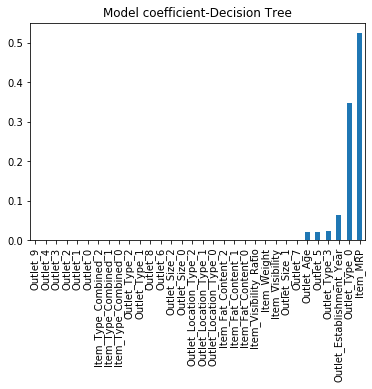

In [135]:
R_alg5=RandomForestRegressor(n_estimators=200,max_depth=5,min_samples_leaf=100,n_jobs=4)
model_fit(R_alg5,train_data2,test_data2,x,target_var,ids)
coef5=pd.Series(R_alg5.feature_importances_,x).sort_values()
coef5.plot(kind='bar',title='Model coefficient-Decision Tree')